___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [4]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas "shap== 0.35.0" matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



import warnings
warnings.filterwarnings('ignore')


In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [7]:
import scipy.stats as stats
import statsmodels.api as sm
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [9]:
df_female = pd.read_csv('ANSUR II FEMALE Public.csv')

In [10]:
df_male = pd.read_csv('ANSUR II MALE Public.csv', encoding = " ISO-8859-1") 

## Explore Data

In [11]:
df_female.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
DODRace,2,3,1,2,1
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195


In [12]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [13]:
df_female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [14]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [15]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [16]:
pd.options.display.max_rows = 300
pd.options.display.max_columns = 100

In [17]:
df_female.isna().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [18]:
df_male.isna().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [19]:
df_female.shape

(1986, 108)

In [20]:
df_male.shape

(4082, 108)

In [21]:
df_female = df_female.rename(columns = {"SubjectId":"subjectid"})

In [22]:
df = pd.concat([df_male, df_female], ignore_index=True)


In [23]:
df.shape

(6068, 108)

In [24]:
df.isnull().sum().any()

True

In [25]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [26]:
df.duplicated().sum()

0

In [27]:
NaN_list =[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        print("{name} = {qty}".format(name = col, qty = df[col].isnull().sum()))
        NaN_list.append(col)

Ethnicity = 4647


In [28]:
df.drop(columns='Ethnicity', inplace = True)

In [29]:
df.shape

(6068, 107)

In [30]:
df.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


SubjectNumericRace – Subject Numeric Race; a single or multi-digit code 
indicating a subject’s self-reported race or races (verified through interview). 
Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 
6 = Pacific Islander, 8 = Other

DODRace – Department of Defense Race; a single digit indicating a subject’s 
self-reported preferred single race where selecting multiple races is not an option. 
This variable is intended to be comparable to the Defense Manpower Data Center 
demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 
5 = Native American, 6 = Pacific Islander, 8 = Other

In [31]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
6063,3,3
6064,3,3
6065,2,2
6066,3,3


In [32]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

In [33]:
df.DODRace.value_counts(dropna=False)

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [34]:

# Count the values in the 'DODRace' column
race_counts = df['DODRace'].value_counts()

# Filter out the 'DODRace' values that have counts less than 500
filtered_races = race_counts[race_counts >= 500].index

# Keep only the rows where 'DODRace' is in the filtered_races
df = df[df['DODRace'].isin(filtered_races)]


In [35]:
df.DODRace.value_counts(dropna = False)

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

Heightin – Height in Inches; self-reported, comparable to measured “stature”
Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”

https://www.thesoldiersproject.org/us-military-height-and-weight-requirements/#:~:text=The%20Minimum%20Height%20is%205%20feet%201%20inch,lbs%20while%20the%20Maximum%20Weight%20is%20241%20lbs
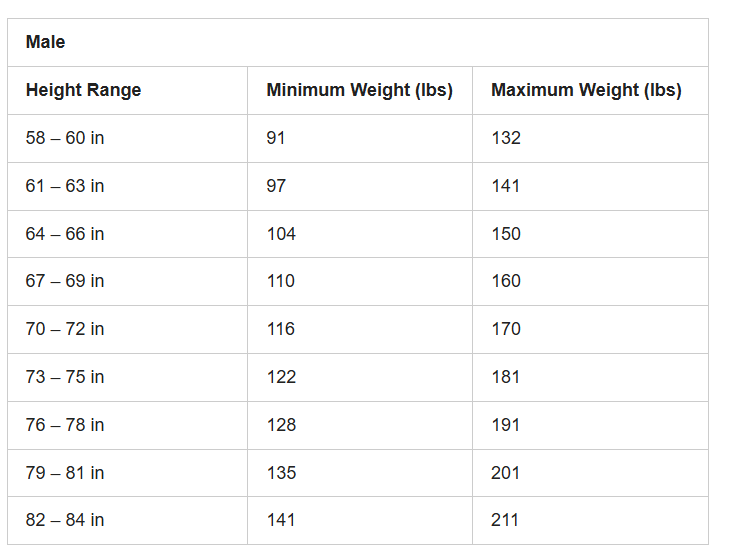


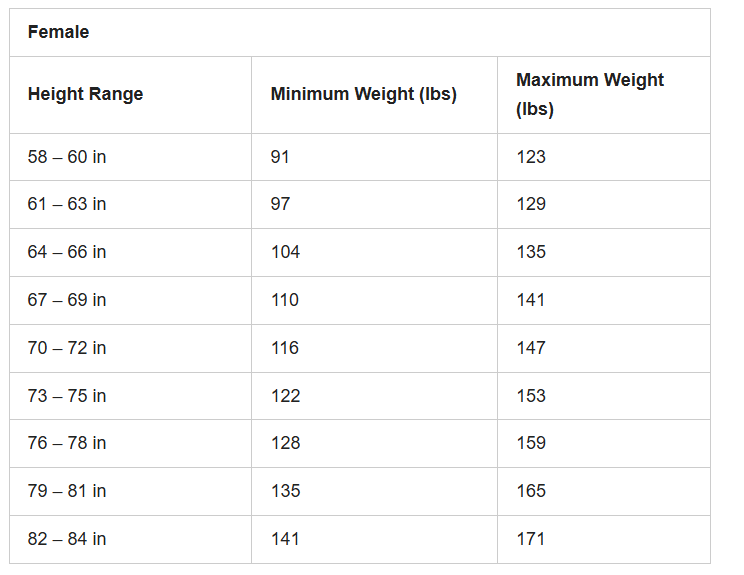

In [36]:
df[['Weightlbs','weightkg']]

,Weightlbs,weightkg
0,180,815
1,160,726
2,205,929
3,175,794
4,213,946
...,...,...
6063,180,832
6064,150,717
6065,168,762
6066,133,632


In [37]:
df.Weightlbs.value_counts()

Weightlbs
170    224
180    219
150    216
175    204
160    203
185    202
165    194
190    186
200    173
155    154
210    147
140    146
195    142
145    140
135    117
220    113
215    109
130    100
205     96
225     76
230     71
148     55
125     53
168     53
178     52
120     49
240     48
158     46
187     44
138     43
235     42
198     41
153     41
167     35
174     35
162     35
173     34
128     34
127     33
250     33
147     33
143     32
172     32
169     32
152     31
183     31
156     31
188     31
182     31
157     31
154     30
137     30
193     29
184     28
194     28
197     28
163     28
196     28
142     27
192     26
181     26
177     26
132     25
176     24
245     22
161     22
212     22
115     21
203     21
133     21
186     21
164     21
218     21
189     20
110     20
204     20
208     19
166     19
171     19
124     18
139     18
118     18
149     18
136     18
179     18
141     18
206     18
207     18
260     17
144     17


In [38]:
df.weightkg.value_counts()

weightkg
791     24
842     23
882     23
695     22
809     21
        ..
1301     1
1202     1
1219     1
1265     1
464      1
Name: count, Length: 774, dtype: int64

In [39]:
df. weightkg = df.weightkg / 10

In [40]:
df = df[(df.Weightlbs >=90) & (df.Weightlbs <= 220)]
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.500,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.600,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.900,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.400,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.600,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,21,77,2

In [41]:
df.Heightin.value_counts(dropna = False)

Heightin
69    566
66    516
70    503
68    493
67    477
71    455
72    382
64    368
65    297
63    248
73    221
62    208
74    165
61     89
60     72
75     70
76     37
59     29
77     19
78      9
80      6
57      5
58      4
79      3
81      2
94      1
56      1
87      1
86      1
Name: count, dtype: int64

In [42]:
df[['Heightin', 'stature']]

,Heightin,stature
0,71,1776
1,68,1702
2,68,1735
3,66,1655
4,77,1914
...,...,...
6063,67,1687
6064,63,1613
6065,66,1644
6066,63,1616


In [43]:
df = df[(df.Heightin >= 58) & (df.Heightin <= 84)]

In [44]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.500,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.600,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.900,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.400,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.600,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,21,77,2

I've found 2 columns with the same information about weight in my dataset.Since the 'weightlbs','weightkg' columns give similar values, I drop the 'weightkg' column. 

In [45]:
df.drop(["Weightlbs"], axis = 1, inplace=True)

In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,...,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,Age,Heightin,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,...,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.500,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,41,71,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,...,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.600,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,35,68,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,...,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.900,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,42,68,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,...,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.400,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,31,66,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,...,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,94.600,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,2

In [48]:
df.shape

(5239, 105)

In [49]:
df.drop(["Heightin"], axis = 1, inplace=True)

# Let's examine object columns

In [50]:
df.select_dtypes(include=['object'])

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Right hand
...,...,...,...,...,...,...,...,...
5234,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
5235,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Right hand
5236,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
5237,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Right hand


In [51]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'WritingPreference'],
      dtype='object')

In [52]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 275 unique value
SubjectsBirthLocation has 133 unique value
WritingPreference has 3 unique value


# Installation 

– U.S. Army installation where the measurement occurred;

In [53]:
df.Installation.value_counts()

Installation
Camp Shelby       1020
Fort Bliss         829
Fort Gordon        615
Fort McCoy         381
Camp Atterbury     366
Fort Hood          360
Fort Huachuca      360
Fort Lee           352
Fort Bragg         348
Fort Drum          316
Fort Stewart       291
Fort Rucker          1
Name: count, dtype: int64

Since the Intallation column is not a column that directly affects DODRace and I do not want to increase the number of columns when we make a dummy, I drop this column.

In [54]:
df.drop(columns='Installation', axis = 1 , inplace=True)

# Date

Date – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”

In [55]:
df.Date.nunique()

253

In [56]:
df.drop(columns='Date', inplace = True)

In [57]:
df.drop(columns= ["Component","PrimaryMOS", 'Branch'], inplace= True)

In [58]:
df.shape

(5239, 99)

In [59]:
df.drop(columns = 'subjectid', inplace = True)

In [60]:
df.shape

(5239, 98)

In [61]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

DODRace
White       3425
Black       1174
Hispanic     640
Name: count, dtype: int64

In [62]:
df.select_dtypes(include = 'O')

,Gender,SubjectsBirthLocation,DODRace,WritingPreference
0,Male,North Dakota,White,Right hand
1,Male,New York,White,Left hand
2,Male,New York,Black,Left hand
3,Male,Wisconsin,White,Right hand
4,Male,North Carolina,Black,Right hand
...,...,...,...,...
5234,Female,Texas,Hispanic,Right hand
5235,Female,Texas,Hispanic,Right hand
5236,Female,Texas,Black,Right hand
5237,Female,Texas,Hispanic,Right hand


In [63]:
df.SubjectsBirthLocation.value_counts(dropna = True)

SubjectsBirthLocation
California                384
New York                  374
Texas                     355
Indiana                   228
Florida                   194
Oklahoma                  190
Illinois                  185
Minnesota                 179
Michigan                  168
Mississippi               161
Georgia                   153
Alabama                   146
South Carolina            144
North Carolina            135
Ohio                      129
Louisiana                 126
Pennsylvania              117
Virginia                  106
Massachusetts             103
Germany                    86
New Jersey                 84
Wisconsin                  83
Puerto Rico                80
Missouri                   75
Maryland                   74
Arizona                    71
Tennessee                  70
Colorado                   69
Kentucky                   58
Kansas                     56
Washington                 55
Arkansas                   48
Iowa              

In [64]:
df = df[df['SubjectsBirthLocation'].map(df['SubjectsBirthLocation'].value_counts()) >= 10]

In [65]:
df.shape

(5028, 98)

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5028.000,241.486,32.651,155.000,217.000,239.000,264.000,358.000
acromialheight,5028.000,1400.636,74.111,1181.000,1347.750,1404.000,1453.000,1683.000
acromionradialelength,5028.000,326.349,19.593,260.000,313.000,327.000,340.000,393.000
anklecircumference,5028.000,223.180,14.524,170.000,213.000,223.000,233.000,281.000
axillaheight,5028.000,1295.363,68.128,1082.000,1248.000,1297.000,1343.000,1553.000
balloffootcircumference,5028.000,242.424,15.755,194.000,231.000,243.000,254.000,297.000
balloffootlength,5028.000,193.824,12.832,151.000,185.000,194.000,203.000,233.000
biacromialbreadth,5028.000,396.578,28.628,311.000,375.000,402.000,418.000,471.000
bicepscircumferenceflexed,5028.000,335.663,37.064,216.000,309.000,337.000,363.000,456.000
bicristalbreadth,5028.000,273.016,18.286,197.000,261.000,273.000,285.000,356.000


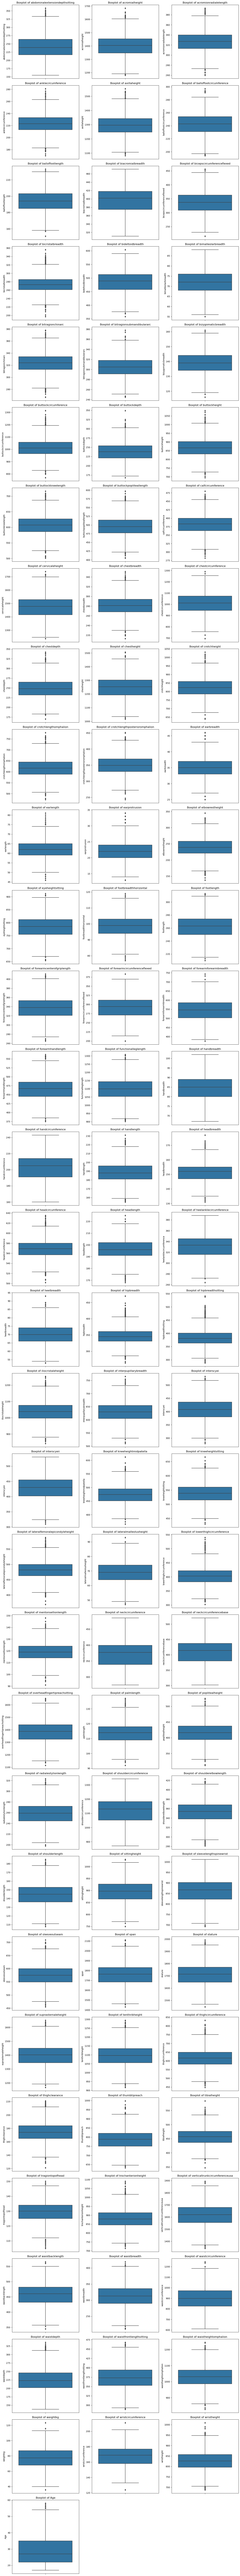

In [67]:
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [68]:
df.duplicated().sum()

0

In [69]:
corr_matrix = df.corr(numeric_only = True)

high_corr_columns = []

threshold = 0.9  

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if corr_value > threshold or corr_value < -threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_columns.append((col1, col2, corr_value))

print("Columns with High Correlation:")
for col1, col2, corr_value in high_corr_columns:
    print(f"{col1} and {col2} - Correlation Value: {corr_value:.2f}")

Columns with High Correlation:
axillaheight and acromialheight - Correlation Value: 0.99
buttockpopliteallength and buttockkneelength - Correlation Value: 0.95
cervicaleheight and acromialheight - Correlation Value: 0.98
cervicaleheight and axillaheight - Correlation Value: 0.97
chestheight and acromialheight - Correlation Value: 0.96
chestheight and axillaheight - Correlation Value: 0.95
chestheight and cervicaleheight - Correlation Value: 0.96
crotchheight and axillaheight - Correlation Value: 0.91
crotchheight and buttockheight - Correlation Value: 0.92
crotchheight and cervicaleheight - Correlation Value: 0.90
footbreadthhorizontal and balloffootcircumference - Correlation Value: 0.91
footlength and balloffootlength - Correlation Value: 0.96
forearmforearmbreadth and bideltoidbreadth - Correlation Value: 0.91
forearmhandlength and forearmcenterofgriplength - Correlation Value: 0.96
handcircumference and handbreadth - Correlation Value: 0.96
hipbreadth and buttockcircumference - Cor

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

# Train| Test Split

In [70]:
X = df.drop(columns = 'DODRace', axis = 1)
y = df.DODRace

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state = 101)

# OrdinalEncoder and Categoric Variables

In [72]:
cat = X_train.select_dtypes('O').columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

# Modeling with Pipeline

In [73]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)

column_trans = make_column_transformer((onehot_enc, cat),
                                       remainder = 'passthrough',
                                       verbose_feature_names_out = False).set_output(transform = 'pandas')
                                        

In [74]:
column_trans.fit_transform(X_train)

,Gender_Female,Gender_Male,SubjectsBirthLocation_Alabama,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_California,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Florida,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_South Carolina,SubjectsBirthLocation_South Dakota,...,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
2304,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,149,584,206,358,81,341,367,1040,680,410,450,505,557,505,74,393,130,371,411,1415,121,447,273,1131,370,157,923,907,601,1858,1765,1438,1125,586,160,839,484,133,882,1578,485,337,901,210,387,1070,76.600,175,827,22
540,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,162,578,199,337,78,337,360,984,695,406,427,449,528,452,74,410,127,406,442,1288,108,405,251,1158,337,154,880,850,554,1688,1674,1343,1033,612,185,777,435,139,838,1562,433,308,886,222,350,1002,77.100,174,767,36
3659,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,145,560,185,297,64,337,376,998,590,328,370,455,513,463,67,362,108,308,350,1282,102,392,240,996,334,130,835,794,537,1617,1603,1314,1046,590,163,690,447,118,846,1543,395,283,777,169,346,974,56.100,146,778,24
1057,0.000,1.000,0.000,0.000,0.000

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [76]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

### Vanilla Logistic Model

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# With Default Parameters

In [78]:
y_pred = pipe_model.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

In [79]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[7.18772765e-03, 1.39195261e-01, 8.53617012e-01],
       [1.65057136e-02, 1.54721495e-03, 9.81947071e-01],
       [1.67241858e-02, 9.75706021e-03, 9.73518754e-01],
       ...,
       [2.83585479e-02, 1.23016973e-02, 9.59339755e-01],
       [1.01412854e-02, 2.81111085e-01, 7.08747630e-01],
       [9.41153340e-04, 2.04117817e-03, 9.97017668e-01]])

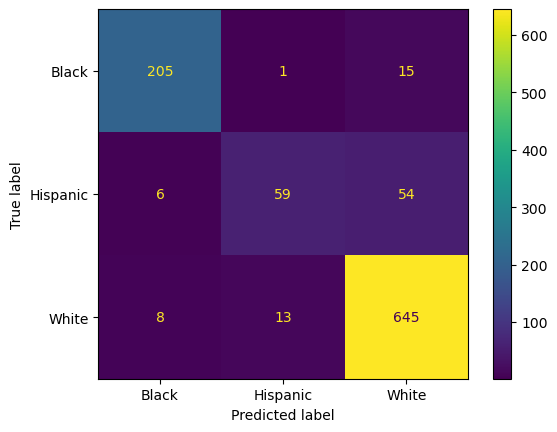

In [80]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [81]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('Test_Set')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print('Train_Set')
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [82]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[205   1  15]
 [  6  59  54]
 [  8  13 645]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93       221
    Hispanic       0.81      0.50      0.61       119
       White       0.90      0.97      0.93       666

    accuracy                           0.90      1006
   macro avg       0.88      0.80      0.83      1006
weighted avg       0.90      0.90      0.90      1006


Train_Set
[[ 814   14   58]
 [  24  281  169]
 [  20   51 2591]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93       886
    Hispanic       0.81      0.59      0.69       474
       White       0.92      0.97      0.95      2662

    accuracy                           0.92      4022
   macro avg       0.89      0.83      0.85      4022
weighted avg       0.91      0.92      0.91      4022



# Cross Validate

In [83]:
from sklearn.model_selection import cross_validate

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.907
train_accuracy          0.917
test_precision_macro    0.880
train_precision_macro   0.896
test_recall_macro       0.809
train_recall_macro      0.827
test_f1_macro           0.837
train_f1_macro          0.855
dtype: float64

# Cross Validate for Hispanic

In [84]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_Hispanic = make_scorer(f1_score,pos_label = 'Hispanic', average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, pos_label = 'Hispanic', average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, pos_label = 'Hispanic', average = None, labels =["Hispanic"])


scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}

In [85]:
from sklearn.model_selection import StratifiedKFold

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scoring = {
           "f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic
}

cv = StratifiedKFold(n_splits =10, shuffle = True, random_state = 101)

scores = cross_validate(pipe_model, X, y, scoring = scoring, cv = cv, return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1,11))

print(df_scores.mean()[2:])


test_f1_Hispanic           0.642
train_f1_Hispanic          0.675
test_precision_Hispanic    0.782
train_precision_Hispanic   0.820
test_recall_Hispanic       0.546
train_recall_Hispanic      0.574
dtype: float64


In [86]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('logistic', LogisticRegression())]

pipe_model = Pipeline(steps = operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.648
train_f1_Hispanic          0.685
test_precision_Hispanic    0.783
train_precision_Hispanic   0.819
test_recall_Hispanic       0.555
train_recall_Hispanic      0.588
dtype: float64

### Logistic Model GridsearchCV

In [87]:
f1_Hispanic = make_scorer(f1_score,pos_label = 'Hispanic', average = None, labels =["Hispanic"])

In [88]:
operations = [
    ('OrdinalEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression())
]

pipe_model = Pipeline(steps=operations)


penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}


In [89]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

grid_search = GridSearchCV(pipe_model, param_grid, cv=cv, scoring=f1_Hispanic, return_train_score=True)

In [90]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']))

In [91]:
grid_search.best_params_

{'logistic__C': 5, 'logistic__penalty': 'l2'}

In [92]:
grid_search.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=5))])

In [93]:
pd.DataFrame(grid_search.cv_results_).loc[grid_search.best_index_, ['mean_test_score', 'mean_train_score']]

mean_test_score    0.672
mean_train_score   0.708
Name: 7, dtype: object

In [94]:
y_pred = grid_search.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

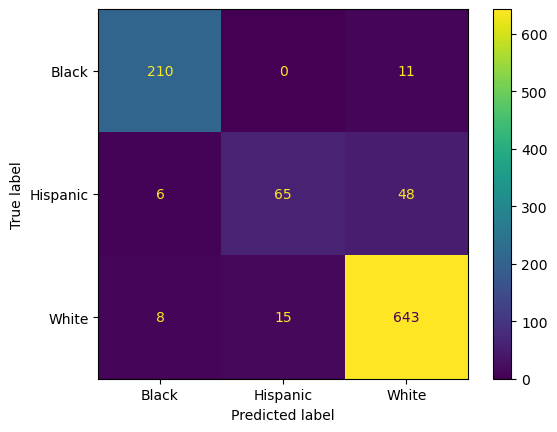

In [95]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test);

In [96]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[210   0  11]
 [  6  65  48]
 [  8  15 643]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94       221
    Hispanic       0.81      0.55      0.65       119
       White       0.92      0.97      0.94       666

    accuracy                           0.91      1006
   macro avg       0.89      0.82      0.85      1006
weighted avg       0.91      0.91      0.91      1006


Train_Set
[[ 826   13   47]
 [  21  302  151]
 [  22   60 2580]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94       886
    Hispanic       0.81      0.64      0.71       474
       White       0.93      0.97      0.95      2662

    accuracy                           0.92      4022
   macro avg       0.89      0.85      0.87      4022
weighted avg       0.92      0.92      0.92      4022



In [97]:
operations = [
    ('OneHotEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression(class_weight = 'balanced', C = 5, solver ='liblinear',
                                    penalty = 'l2', 
                                    random_state = 101))
]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                       X_train,
                       y_train,
                       scoring = scoring,
                       cv = 10,
                       return_train_score = True)

df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]


test_f1_Hispanic           0.653
train_f1_Hispanic          0.709
test_precision_Hispanic    0.657
train_precision_Hispanic   0.707
test_recall_Hispanic       0.652
train_recall_Hispanic      0.711
dtype: float64

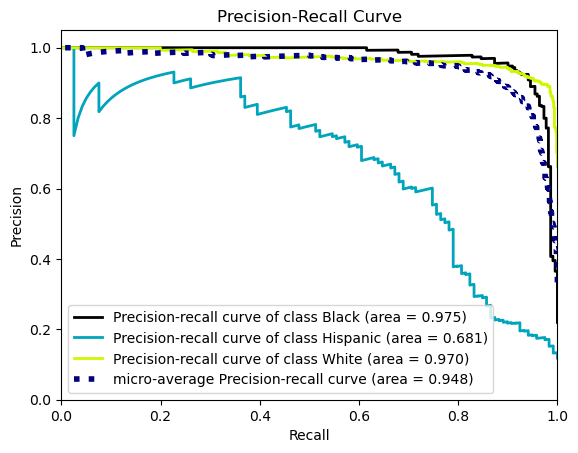

In [98]:
from scikitplot.metrics import plot_roc, plot_precision_recall, plot_precision_recall

operations = [
    ('OrdinalEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('logistic', LogisticRegression(class_weight = 'balanced', C =5, solver ='liblinear',
                                    penalty = 'l2', 
                                    random_state = 101))
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

y_pred_proba = pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [99]:
pd.get_dummies(y_test).values

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [100]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.6813316566739626

In [101]:
y_pred = grid_search.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_precision = precision_score(y_test, y_pred, average = None, labels = ['Hispanic'])
log_recall = recall_score(y_test, y_pred, average = None, labels = ['Hispanic'])

print(log_AP)
print(log_precision)
print(log_recall)

0.6813316566739626
[0.8125]
[0.54621849]


## 2. SVC

### Vanilla SVC model

In [102]:
operations = [
    ('OneHotEncoder', column_trans), 
    ('scaler', MinMaxScaler()), 
    ('svc', SVC(class_weight = 'balanced', random_state = 101))
]

svc_model = Pipeline(steps=operations)

svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [103]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[204   9   8]
 [  5  87  27]
 [ 16  78 572]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       221
    Hispanic       0.50      0.73      0.59       119
       White       0.94      0.86      0.90       666

    accuracy                           0.86      1006
   macro avg       0.78      0.84      0.80      1006
weighted avg       0.88      0.86      0.87      1006


Train_Set
[[ 832   29   25]
 [  16  406   52]
 [  53  322 2287]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       886
    Hispanic       0.54      0.86      0.66       474
       White       0.97      0.86      0.91      2662

    accuracy                           0.88      4022
   macro avg       0.81      0.88      0.83      4022
weighted avg       0.91      0.88      0.89      4022



# SVC Model Cross Validation

In [104]:
from sklearn.model_selection import cross_validate

operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()), ('svc', SVC())]

svc_model = Pipeline(steps = operations)

scores = cross_validate(svc_model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, n_jobs = -1, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.888
train_accuracy          0.900
test_precision_macro    0.915
train_precision_macro   0.931
test_recall_macro       0.734
train_recall_macro      0.755
test_f1_macro           0.776
train_f1_macro          0.798
dtype: float64

# SVC Model Gridsearch

In [110]:
recall_Hispanic =  make_scorer(recall_score, pos_label='Hispanic', average=None, labels=["Hispanic"])

In [111]:
param_grid = {
    'svc__C': [0.01,0.1,0.3,1.0],
    'svc__gamma': ['scale', 'auto', 0.2],
    'svc__kernel': ['linear','rbf'],
    
}

In [115]:
operations = [('OneHotEncoder', column_trans), ('scaler', MinMaxScaler()),
              ('svc', SVC(class_weight = 'balanced',
                                              random_state = 42))]

pipe_model = Pipeline(steps = operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid=param_grid,
                              scoring=recall_Hispanic,
                              cv=10, 
                              n_jobs=-1, 
                              verbose=2,
                             return_train_score = True)

In [116]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 0.3, 1.0],
                         'svc__gamma': ['scale', 'auto', 0.2],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']),
             verbose=2)

In [117]:
svm_model_grid.best_params_

{'svc__C': 0.3, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [118]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=0.3, class_weight='balanced', kernel='linear',
                     random_state=42))])

In [119]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.770
mean_train_score   0.832
Name: 12, dtype: object

In [120]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[208   6   7]
 [  5  90  24]
 [ 22  74 570]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.91       221
    Hispanic       0.53      0.76      0.62       119
       White       0.95      0.86      0.90       666

    accuracy                           0.86      1006
   macro avg       0.79      0.85      0.81      1006
weighted avg       0.88      0.86      0.87      1006


Train_Set
[[ 830   34   22]
 [  19  391   64]
 [  59  317 2286]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       886
    Hispanic       0.53      0.82      0.64       474
       White       0.96      0.86      0.91      2662

    accuracy                           0.87      4022
   macro avg       0.80      0.87      0.83      4022
weighted avg       0.90      0.87      0.88      4022



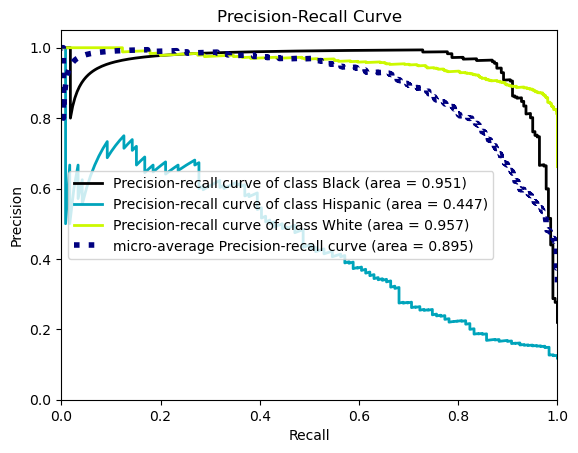

In [121]:
operations = [("OneHot_Encoder", column_trans), 
              ("svc", SVC(class_weight = 'balanced', kernel = 'linear',
                                              C = 0.01,
                                              random_state = 101))]


svc_model = Pipeline(steps=operations)

svc_model.fit(X_train, y_train)

decision_function = svc_model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test) # should not use predict_proba  . should use decision func.
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [185]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

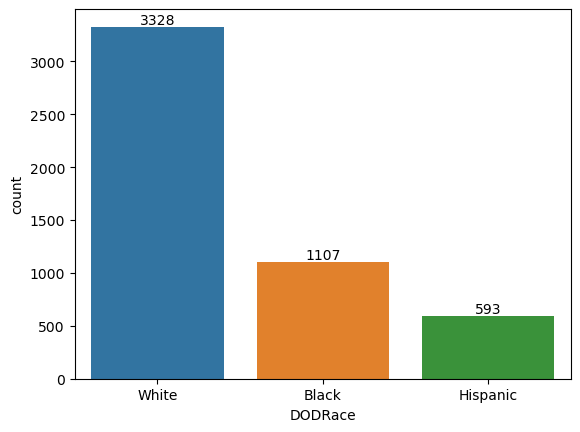

In [122]:
ax = sns.countplot(x="DODRace", data = df)
ax.bar_label(ax.containers[0]);

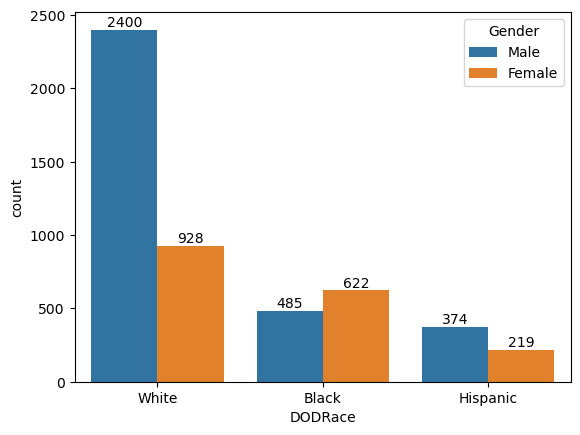

In [123]:
ax = sns.countplot(x="DODRace", data = df, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

In [124]:
X = df.drop('DODRace', axis = 1)
y = df.DODRace

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [126]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [127]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")


In [138]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=42))])

In [139]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [141]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[169   2  50]
 [ 16   6  97]
 [ 16   3 647]]
              precision    recall  f1-score   support

       Black       0.84      0.76      0.80       221
    Hispanic       0.55      0.05      0.09       119
       White       0.81      0.97      0.89       666

    accuracy                           0.82      1006
   macro avg       0.73      0.60      0.59      1006
weighted avg       0.79      0.82      0.77      1006


Train_Set
[[ 886    0    0]
 [   0  474    0]
 [   0    0 2662]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       886
    Hispanic       1.00      1.00      1.00       474
       White       1.00      1.00      1.00      2662

    accuracy                           1.00      4022
   macro avg       1.00      1.00      1.00      4022
weighted avg       1.00      1.00      1.00      4022



In [142]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_macro",
                                 "recall_macro",
                                 "f1_macro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy           0.819
train_accuracy          1.000
test_precision_macro    0.763
train_precision_macro   1.000
test_recall_macro       0.597
train_recall_macro      1.000
test_f1_macro           0.604
train_f1_macro          1.000
dtype: float64

In [143]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=["accuracy",
                                 "precision_micro",
                                 "recall_micro",
                                 "f1_micro"],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.819
train_accuracy          1.000
test_precision_micro    0.819
train_precision_micro   1.000
test_recall_micro       0.819
train_recall_micro      1.000
test_f1_micro           0.819
train_f1_micro          1.000
dtype: float64

In [145]:
operations = [("ColumnTransformer", column_trans), 
              ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                  random_state=42))]


rf_model = Pipeline(steps=operations)

scores = cross_validate(rf_model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.082
train_f1_Hispanic          1.000
test_precision_Hispanic    0.588
train_precision_Hispanic   1.000
test_recall_Hispanic       0.044
train_recall_Hispanic      1.000
dtype: float64

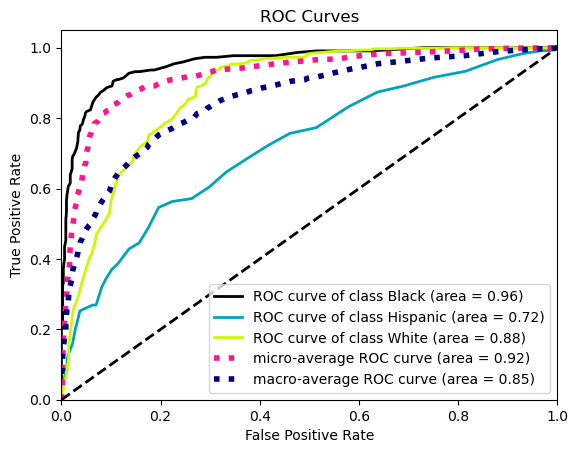

In [146]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

### RF Model GridsearchCV

In [147]:
recall_Hispanic =  make_scorer(recall_score, pos_label='Hispanic', average=None, labels=["Hispanic"])

In [148]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state= 42))]

pipe_model = Pipeline(steps=operations)

In [149]:
# Define the parameter grid with the correct prefixes
param_grid = {'RF_model__n_estimators':[300 , 400, 500], 
             'RF_model__max_depth':[2, None],
             'RF_model__min_samples_split':[5, 10, 20],
             'RF_model__min_samples_leaf': [100],
             'RF_model__max_samples':[0.1, 0.2, 0.3]}

In [150]:
# Create the GridSearchCV object
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             scoring = recall_Hispanic,  
                             n_jobs=-1,
                             cv=10,
                             return_train_score=True,
                             verbose=2)


In [151]:
# Fit the GridSearchCV object
rf_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ColumnTransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClass...
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, None],
                         'RF_model__max_samples': [0.1, 0.2, 0.3],
                         'RF_model__min_samples_leaf': [100],
                         'RF_model__min_samples_split': [5, 10, 20],
                         'RF_model__n_estimators': [300, 400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Hispanic, average=None, labels=['Hispanic']),
             verbose=2)

In [152]:
rf_grid_model.best_params_

{'RF_model__max_depth': None,
 'RF_model__max_samples': 0.2,
 'RF_model__min_samples_leaf': 100,
 'RF_model__min_samples_split': 5,
 'RF_model__n_estimators': 500}

In [153]:
pd.DataFrame(rf_grid_model.cv_results_).loc[rf_grid_model.best_index_, 
                                            ['mean_test_score', 'mean_train_score']]

mean_test_score    0.631
mean_train_score   0.655
Name: 38, dtype: object

In [154]:
rf_grid_model.best_estimator_

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        max_samples=0.2, min_samples_leaf=100,
                                        min_samples_split=5, n_estimators=500,
                                        random_state=42))])

In [155]:
rf_grid_model.best_score_

0.6312943262411348

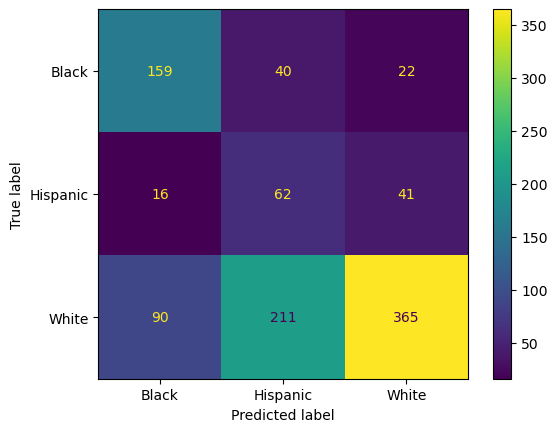

In [156]:
ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test);

In [157]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[159  40  22]
 [ 16  62  41]
 [ 90 211 365]]
              precision    recall  f1-score   support

       Black       0.60      0.72      0.65       221
    Hispanic       0.20      0.52      0.29       119
       White       0.85      0.55      0.67       666

    accuracy                           0.58      1006
   macro avg       0.55      0.60      0.54      1006
weighted avg       0.72      0.58      0.62      1006


Train_Set
[[ 659  127  100]
 [  57  307  110]
 [ 255  879 1528]]
              precision    recall  f1-score   support

       Black       0.68      0.74      0.71       886
    Hispanic       0.23      0.65      0.34       474
       White       0.88      0.57      0.69      2662

    accuracy                           0.62      4022
   macro avg       0.60      0.66      0.58      4022
weighted avg       0.76      0.62      0.66      4022



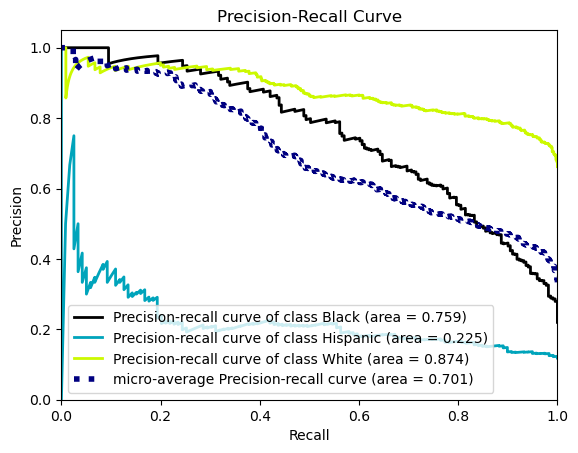

In [158]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_depth= None,
                                                     max_samples= 0.3,
                                                     min_samples_leaf= 100,
                                                     min_samples_split= 5,
                                                     n_estimators= 300, 
                                                     random_state=101))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [159]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.12856623744508497

In [160]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


print(rf_AP)
print(rf_precision)
print(rf_recall)

0.12856623744508497
[0.19808307]
[0.5210084]


## 4. XGBoost

### Vanilla XGBoost Model

In [161]:
from xgboost import XGBClassifier

In [162]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2})
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})

pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callb...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [163]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[190   4  27]
 [  8  35  76]
 [ 13   6 647]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       221
           1       0.78      0.29      0.43       119
           2       0.86      0.97      0.91       666

    accuracy                           0.87      1006
   macro avg       0.85      0.71      0.74      1006
weighted avg       0.86      0.87      0.85      1006


Train_Set
[[ 886    0    0]
 [   0  474    0]
 [   0    0 2662]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       474
           2       1.00      1.00      1.00      2662

    accuracy                           1.00      4022
   macro avg       1.00      1.00      1.00      4022
weighted avg       1.00      1.00      1.00      4022



In [164]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train_xgb)
classes_weights

array([2.82841069, 1.5131678 , 2.82841069, ..., 0.50363135, 0.50363135,
       0.50363135])

In [165]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
765,2.828,1
3738,1.513,0
1419,2.828,1
48,0.504,2
3056,0.504,2


In [166]:
comp.groupby("label").value_counts()

# weight x class is equal to this result.

label  weights
0      1.513       886
1      2.828       474
2      0.504      2662
Name: count, dtype: int64

In [167]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,  
                   XGB_model__sample_weight=classes_weights)

# weight parameter in XGBoost is per instance not per class. Therefore, I need to assign the weight of each class to its 
# instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callb...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [168]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[190   8  23]
 [  6  53  60]
 [ 18  14 634]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       221
           1       0.71      0.45      0.55       119
           2       0.88      0.95      0.92       666

    accuracy                           0.87      1006
   macro avg       0.83      0.75      0.78      1006
weighted avg       0.86      0.87      0.86      1006


Train_Set
[[ 886    0    0]
 [   0  474    0]
 [   0    0 2662]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       886
           1       1.00      1.00      1.00       474
           2       1.00      1.00      1.00      2662

    accuracy                           1.00      4022
   macro avg       1.00      1.00      1.00      4022
weighted avg       1.00      1.00      1.00      4022



In [169]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[1]),
               "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
               "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}

In [170]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv=5, 
                        return_train_score=True,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic    0.663
train_precision_Hispanic   1.000
test_recall_Hispanic       0.418
train_recall_Hispanic      1.000
test_f1_Hispanic           0.512
train_f1_Hispanic          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [171]:
param_grid = {"XGB_model__n_estimators":[70, 80],
              'XGB_model__max_depth':[1, 2],
              "XGB_model__learning_rate": [0.0001,0.001],
              "XGB_model__colsample_bytree":[0.5,0.7, 1]} 

In [172]:
operations = [("OrdinalEncoder", column_trans), 
              ("XGB_model", XGBClassifier(random_state=42))]


model = Pipeline(steps=operations)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=make_scorer(precision_score, average = None, labels =[1]),
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [173]:
xgb_grid_model.fit(X_train,
                   y_train_xgb,
                   XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBClassifier(base_s...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.7, 1],
                         'XGB_model__learning_rate': [0.0001, 0.001],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [70, 80]},
             return_train_score=True,
             scoring=make_scorer(precision_score, response_method='predict', average=None, labels=[1]))

In [174]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callb...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=2,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=80,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [175]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.5,
 'XGB_model__learning_rate': 0.001,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 80}

In [176]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.226
mean_train_score   0.258
Name: 7, dtype: object

In [177]:
xgb_grid_model.best_score_

0.22573226155190834

In [178]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[146  49  26]
 [ 16  58  45]
 [ 95 190 381]]
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       221
           1       0.20      0.49      0.28       119
           2       0.84      0.57      0.68       666

    accuracy                           0.58      1006
   macro avg       0.54      0.57      0.52      1006
weighted avg       0.71      0.58      0.62      1006


Train_Set
[[ 629  166   91]
 [  45  312  117]
 [ 262  767 1633]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       886
           1       0.25      0.66      0.36       474
           2       0.89      0.61      0.73      2662

    accuracy                           0.64      4022
   macro avg       0.60      0.66      0.59      4022
weighted avg       0.76      0.64      0.67      4022



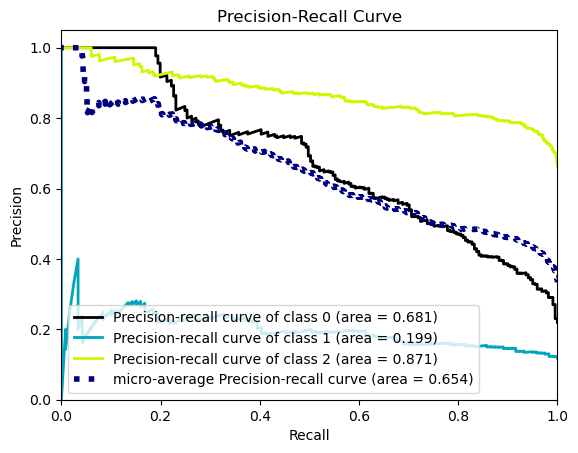

In [179]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_roc, plot_precision_recall

operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42,
                                             max_depth = 2,
                                             n_estimators = 80,
                                             colsample_bytree = 0.5,
                                             learning_rate = 0.0001
                                            ))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, 
          y_train_xgb, 
          XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()


In [180]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [181]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.19902701040662957

In [182]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_precision = precision_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.7376215262514891

## Comparing Models

In [186]:
compare= pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                       "Precision": [log_precision[0], svc_precision[0], rf_precision[0], xgb_precision[0]],
                       "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                       "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

compare

,Model,Precision,Recall,AP
0,Logistic Regression,0.812,0.546,0.681
1,SVM,0.543,0.840,0.447
2,Random Forest,0.198,0.521,0.129
3,XGBoost,0.195,0.487,0.199


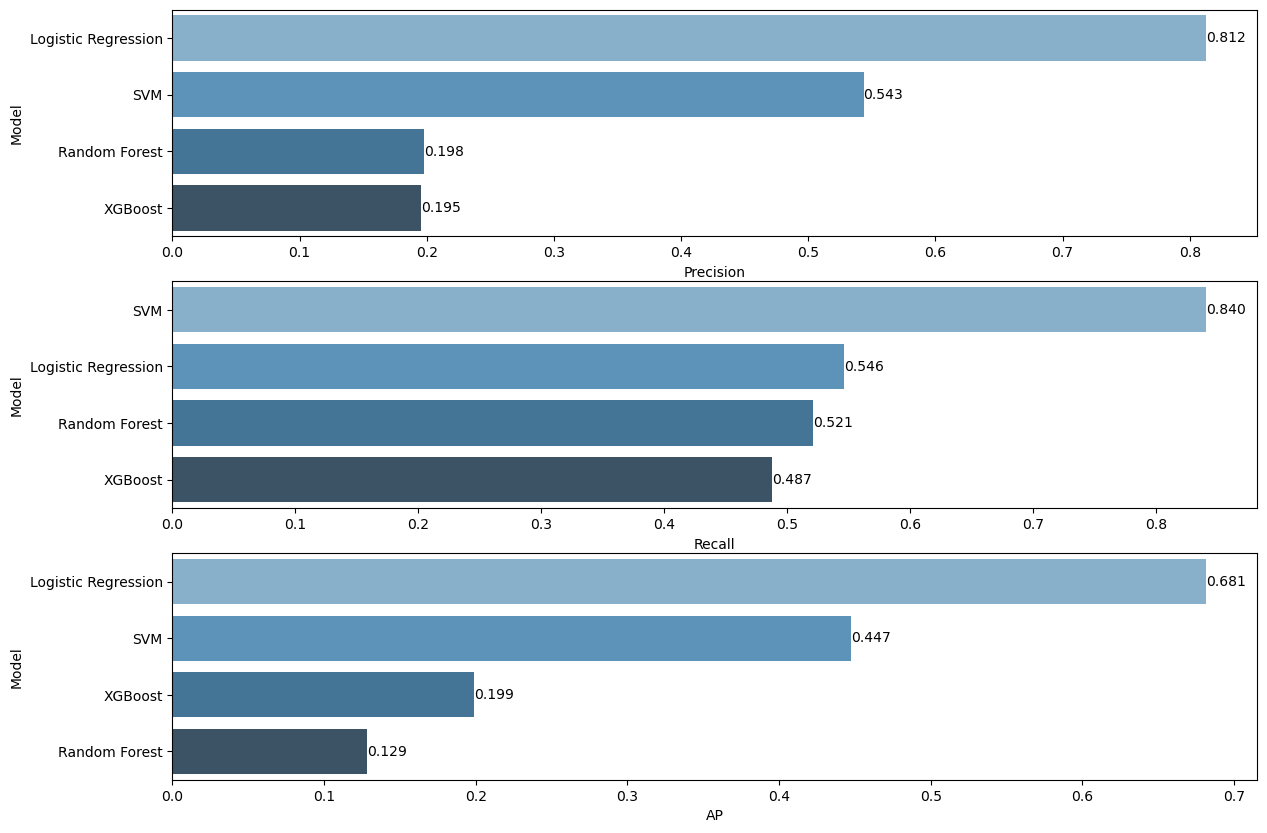

In [187]:
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

**When attempting to increase the precision for the Hispanic class in the dataset, it was found that Logistic Regression yielded the best results among the implemented machine learning algorithms, resulting in a decision to proceed with it.**

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___